In [ ]:
from tensorflow.keras import optimizers
from keras import losses 
from keras import optimizers 
from keras import metrics
import keras
from keras.models import Model
from keras.layers import Dense
from keras import optimizers
from keras.preprocessing.image import ImageDataGenerator
from keras.preprocessing import image

trdata = ImageDataGenerator()
traindata = trdata.flow_from_directory(directory="/content/drive/MyDrive/Colab Notebooks/chestx-ray/traindata",target_size=(224,224))
tsdata = ImageDataGenerator()
testdata = tsdata.flow_from_directory(directory="/content/drive/MyDrive/Colab Notebooks/chestx-ray/testdata", target_size=(224,224))

from keras.applications.vgg19 import VGG19
vggmodel = VGG19(weights='imagenet', include_top=True)

vggmodel.summary()

for layers in (vggmodel.layers)[:19]:
    print(layers)
    layers.trainable = False
    
X= vggmodel.layers[-2].output
predictions = Dense(2, activation="softmax")(X)
#model_final = Model(input = vggmodel.input, output = predictions) ### previouscommand
model_final = Model(vggmodel.input, predictions) ### updated command
# model_final.compile(loss = "categorical_crossentropy", optimizer = optimizers(lr=0.001, momentum=0.9), metrics=["accuracy"],\\)


model_final.summary()
model_final.compile(loss = 'mean_squared_error', optimizer = 'sgd', metrics = [metrics.categorical_accuracy])




from keras.callbacks import ModelCheckpoint, EarlyStopping
checkpoint = ModelCheckpoint("vgg19New.h5", monitor='val_categorical_accuracy', verbose=1, save_best_only=False, save_weights_only=False, mode='auto', period=1)
early = EarlyStopping(monitor='val_categorical_accuracy', min_delta=0, patience=20, verbose=1, mode='auto')
hist = model_final.fit_generator(steps_per_epoch=2,generator=traindata, validation_data= testdata, validation_steps=2,epochs=2,callbacks=[checkpoint,early])
#model_final.save_weights("VGG16TransferLData1.h5")
#model.save("VGG16TransferLData1X.h5")

# import matplotlib.pyplot as plt
# plt.plot(hist.history['categorical_accuracy:'])
# plt.plot(hist.history['val_categorical_accuracy:'])
# plt.title('model accuracy')
# plt.ylabel('accuracy')
# plt.xlabel('epoch')
# plt.legend(['train acc', 'val acc'], loc='upper left')
# plt.savefig('VGG19accNew.png', dpi=300, bbox_inches='tight')
# plt.show()
# # summarize history for loss
# plt.plot(hist.history['loss'])
# plt.plot(hist.history['val_loss'])
# plt.title('model loss')
# plt.ylabel('loss')
# plt.xlabel('epoch')
# plt.legend(['train loss', 'validation loss'], loc='upper left')
# plt.savefig('VGG19lossNew.png', dpi=300, bbox_inches='tight')
# plt.show()

Found 200 images belonging to 2 classes.
Found 90 images belonging to 2 classes.
574710816/574710816 [==============================] - 18s 0us/step
Model: "vgg19"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112

<ipython-input-1-8941d8eacc2a>:48: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  hist = model_final.fit_generator(steps_per_epoch=2,generator=traindata, validation_data= testdata, validation_steps=2,epochs=2,callbacks=[checkpoint,early])


Epoch 1/2
2/2 [==============================] - ETA: 0s - loss: 0.4764 - categorical_accuracy: 0.4844 
Epoch 1: saving model to vgg19New.h5
2/2 [==============================] - 109s 77s/step - loss: 0.4764 - categorical_accuracy: 0.4844 - val_loss: 0.5312 - val_categorical_accuracy: 0.4688
Epoch 2/2
2/2 [==============================] - ETA: 0s - loss: 0.5156 - categorical_accuracy: 0.4844 
Epoch 2: saving model to vgg19New.h5
2/2 [==============================] - 88s 64s/step - loss: 0.5156 - categorical_accuracy: 0.4844 - val_loss: 0.5000 - val_categorical_accuracy: 0.5000


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

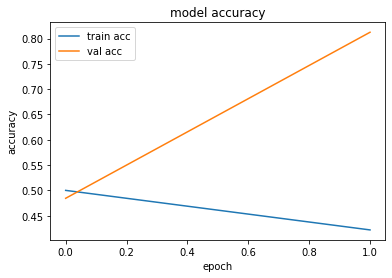

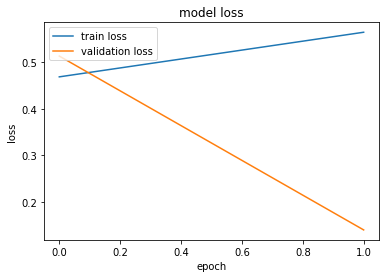

In [ ]:
import matplotlib.pyplot as plt
plt.plot(hist.history['categorical_accuracy'])
plt.plot(hist.history['val_categorical_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train acc', 'val acc'], loc='upper left')
plt.savefig('VGG19accNew.png', dpi=300, bbox_inches='tight')
plt.show()
# summarize history for loss
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train loss', 'validation loss'], loc='upper left')
plt.savefig('VGG19lossNew.png', dpi=300, bbox_inches='tight')
plt.show()

In [1]:
from tensorflow.keras import optimizers
from keras import losses 
from keras import optimizers 
from keras import metrics
import keras
from keras.models import Model
from keras.layers import Dense
from keras import optimizers
from keras.preprocessing.image import ImageDataGenerator
from keras.preprocessing import image



In [2]:
trdata = ImageDataGenerator()
traindata = trdata.flow_from_directory(directory="/content/drive/MyDrive/Colab Notebooks/chestx-ray/traindata",target_size=(224,224))
tsdata = ImageDataGenerator()
testdata = tsdata.flow_from_directory(directory="/content/drive/MyDrive/Colab Notebooks/chestx-ray/testdata", target_size=(224,224))

Found 200 images belonging to 2 classes.
Found 90 images belonging to 2 classes.


In [3]:
from keras.applications.vgg19 import VGG19
vggmodel = VGG19(weights='imagenet', include_top=True)

vggmodel.summary()

574710816/574710816 [==============================] - 17s 0us/step
Model: "vgg19"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                           

In [4]:
for layers in (vggmodel.layers)[:19]:
    print(layers)
    layers.trainable = False
    
X= vggmodel.layers[-2].output
predictions = Dense(2, activation="softmax")(X)
#model_final = Model(input = vggmodel.input, output = predictions) ### previouscommand
model_final = Model(vggmodel.input, predictions) ### updated command
# model_final.compile(loss = "categorical_crossentropy", optimizer = optimizers(lr=0.001, momentum=0.9), metrics=["accuracy"],\\)


model_final.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0     

In [5]:
model_final.compile(loss = 'mean_squared_error', optimizer = 'sgd', metrics = [metrics.categorical_accuracy])

In [6]:
hist = model_final.fit_generator(generator=traindata, validation_data= testdata, epochs=2)

<ipython-input-6-ca1d82b62c49>:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  hist = model_final.fit_generator(generator=traindata, validation_data= testdata, epochs=2)


Epoch 1/2
7/7 [==============================] - 111s 16s/step - loss: 0.5034 - categorical_accuracy: 0.4900 - val_loss: 0.5000 - val_categorical_accuracy: 0.5000
Epoch 2/2
7/7 [==============================] - 6s 858ms/step - loss: 0.5000 - categorical_accuracy: 0.5000 - val_loss: 0.5000 - val_categorical_accuracy: 0.5000


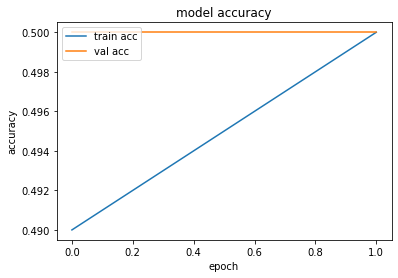

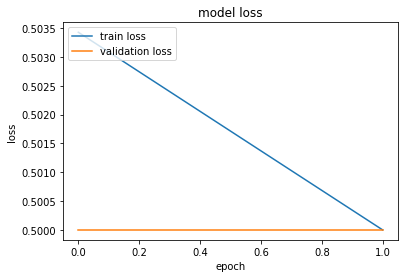

In [7]:
import matplotlib.pyplot as plt
plt.plot(hist.history['categorical_accuracy'])
plt.plot(hist.history['val_categorical_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train acc', 'val acc'], loc='upper left')
plt.savefig('VGG19accNew.png', dpi=300, bbox_inches='tight')
plt.show()
# summarize history for loss
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train loss', 'validation loss'], loc='upper left')
plt.savefig('VGG19lossNew.png', dpi=300, bbox_inches='tight')
plt.show()

In [ ]:
callbacks

verbose= 1
0 
1

In [9]:
import tensorflow as tf
from keras.preprocessing.image import ImageDataGenerator

In [8]:
train_datagen = ImageDataGenerator(rescale=1./255,
                                   rotation_range=20,
                                   width_shift_range=0.2,
                                   height_shift_range=0.2,
                                   horizontal_flip=True)

val_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)
training_set = train_datagen.flow_from_directory('/content/drive/MyDrive/Colab Notebooks/chestx-ray/traindata', 
                                               target_size=(224, 224), 
                                               color_mode='rgb',
                                               batch_size= 16,
                                               class_mode='categorical',
                                               shuffle=True) 

validation = train_datagen.flow_from_directory('/content/drive/MyDrive/Colab Notebooks/chestx-ray/testdata', 
                                           target_size=(224, 224), 
                                           color_mode='rgb',
                                           batch_size= 16,
                                           class_mode='categorical',
                                           shuffle=True)
test_data = test_datagen.flow_from_directory('/content/drive/MyDrive/Colab Notebooks/chestx-ray/testdata',
                                                 target_size = (224, 224),
                                                 batch_size = 16,
                                                 class_mode = 'categorical', shuffle = False)

Found 200 images belonging to 2 classes.
Found 90 images belonging to 2 classes.
Found 90 images belonging to 2 classes.


In [10]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(16, (3,3), activation='relu', padding='SAME', input_shape=(224, 224, 3)),
    tf.keras.layers.Conv2D(16, (3,3), activation='relu', padding='SAME'),
    tf.keras.layers.MaxPooling2D(2,2),
    
    tf.keras.layers.Conv2D(32, (3,3), activation='relu', padding='SAME'),
    tf.keras.layers.Conv2D(32, (3,3), activation='relu', padding='SAME'),
    tf.keras.layers.MaxPooling2D(2,2),
    
    tf.keras.layers.Conv2D(64, (3,3), activation='relu', padding='SAME'),
    tf.keras.layers.Conv2D(64, (3,3), activation='relu', padding='SAME'),
    tf.keras.layers.MaxPooling2D(2,2),
    
    tf.keras.layers.Conv2D(128, (3,3), activation='relu', padding='SAME'),
    tf.keras.layers.Conv2D(128, (3,3), activation='relu', padding='SAME'),
    tf.keras.layers.MaxPooling2D(2,2),
    
    tf.keras.layers.Conv2D(256, (3,3), activation='relu', padding='SAME'),
    tf.keras.layers.Conv2D(256, (3,3), activation='relu', padding='SAME'),
    tf.keras.layers.MaxPooling2D(2,2),
        
    tf.keras.layers.Conv2D(512, (3,3), activation='relu', padding='SAME'),
    tf.keras.layers.Conv2D(512, (3,3), activation='relu', padding='SAME'),
    tf.keras.layers.MaxPooling2D(2,2),   
    
    
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(1024, activation='relu'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(2, activation='softmax')
])


In [11]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 224, 224, 16)      448       
                                                                 
 conv2d_1 (Conv2D)           (None, 224, 224, 16)      2320      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 112, 112, 16)     0         
 )                                                               
                                                                 
 conv2d_2 (Conv2D)           (None, 112, 112, 32)      4640      
                                                                 
 conv2d_3 (Conv2D)           (None, 112, 112, 32)      9248      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 56, 56, 32)       0         
 2D)                                                    

In [13]:
optimizer = tf.keras.optimizers.RMSprop(learning_rate=0.001)

model.compile(optimizer=optimizer,
              loss='categorical_crossentropy',
              metrics=['accuracy'])

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 224, 224, 16)      448       
                                                                 
 conv2d_1 (Conv2D)           (None, 224, 224, 16)      2320      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 112, 112, 16)     0         
 )                                                               
                                                                 
 conv2d_2 (Conv2D)           (None, 112, 112, 32)      4640      
                                                                 
 conv2d_3 (Conv2D)           (None, 112, 112, 32)      9248      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 56, 56, 32)       0         
 2D)                                                    

In [15]:
history = model.fit(
    training_set,
    epochs=10,
    verbose=1,
    validation_data=validation
)

Epoch 1/10
13/13 [==============================] - 12s 805ms/step - loss: 0.6976 - accuracy: 0.5150 - val_loss: 0.6940 - val_accuracy: 0.5000
Epoch 2/10
13/13 [==============================] - 7s 589ms/step - loss: 0.6964 - accuracy: 0.5000 - val_loss: 0.6932 - val_accuracy: 0.5000
Epoch 3/10
13/13 [==============================] - 8s 671ms/step - loss: 0.6950 - accuracy: 0.4700 - val_loss: 0.6932 - val_accuracy: 0.5000
Epoch 4/10
13/13 [==============================] - 12s 984ms/step - loss: 0.6943 - accuracy: 0.4750 - val_loss: 0.6932 - val_accuracy: 0.5000
Epoch 5/10
13/13 [==============================] - 9s 676ms/step - loss: 0.6936 - accuracy: 0.4950 - val_loss: 0.6935 - val_accuracy: 0.5000
Epoch 6/10
13/13 [==============================] - 8s 594ms/step - loss: 0.6951 - accuracy: 0.4550 - val_loss: 0.6932 - val_accuracy: 0.5000
Epoch 7/10
13/13 [==============================] - 8s 641ms/step - loss: 0.6949 - accuracy: 0.4850 - val_loss: 0.6932 - val_accuracy: 0.5000
Epoc

<Figure size 432x288 with 0 Axes>

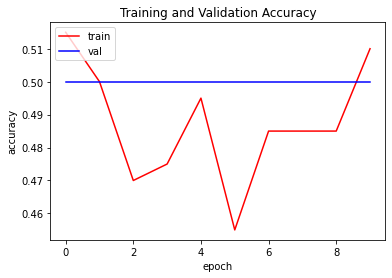

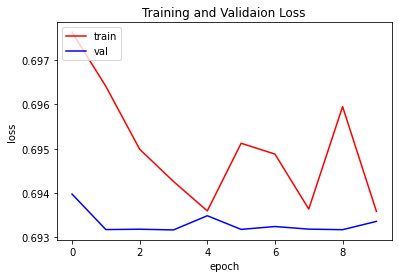

<Figure size 432x288 with 0 Axes>

In [16]:
import matplotlib.image as mpimg
import matplotlib.pyplot as plt

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'r')
plt.plot(epochs, val_acc, 'b')
plt.title('Training and Validation Accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.figure()

plt.plot(epochs, loss, 'r')
plt.plot(epochs, val_loss, 'b')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.title('Training and Validaion Loss')
plt.figure()

In [17]:
import numpy as np
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import plot_confusion_matrix
print("==============TEST RESULTS============")
from sklearn.metrics import confusion_matrix
y_pred = model.predict(test_data)
y_pred = np.argmax(y_pred, axis=1)
print('Confusion Matrix')
print(confusion_matrix(test_data.classes, y_pred))
print('Classification Report')
target_names = ['normal', 'pneumonia']
print(classification_report(test_data.classes, y_pred, target_names=target_names))

==============TEST RESULTS============
6/6 [==============================] - 2s 200ms/step
Confusion Matrix
[[ 0 45]
 [ 0 45]]
Classification Report
              precision    recall  f1-score   support

      normal       0.00      0.00      0.00        45
   pneumonia       0.50      1.00      0.67        45

    accuracy                           0.50        90
   macro avg       0.25      0.50      0.33        90
weighted avg       0.25      0.50      0.33        90



/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
